In [12]:
# step 1 importing and libraries for calculation and storing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# stept 2 importing amazon alexa dataset and display first  five recors
df_reviews=pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
#step 3 display top records
df_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# step 4 display no of rows and column
df_reviews.shape

(3150, 5)

In [5]:
# step 5 display structure of file
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
#6 describing descriptive analytics
df_reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
#7 converting data from object to data datatype and displaying year
df_reviews['date']=pd.to_datetime(df_reviews['date'])

In [8]:
#display year
df_reviews['date'].dt.year.value_counts()

2018    3150
Name: date, dtype: int64

In [9]:
# displaying minimum date
df_reviews['date'].min()

Timestamp('2018-05-16 00:00:00')

In [10]:
#10 displaying maximum date
df_reviews['date'].max()

Timestamp('2018-07-31 00:00:00')

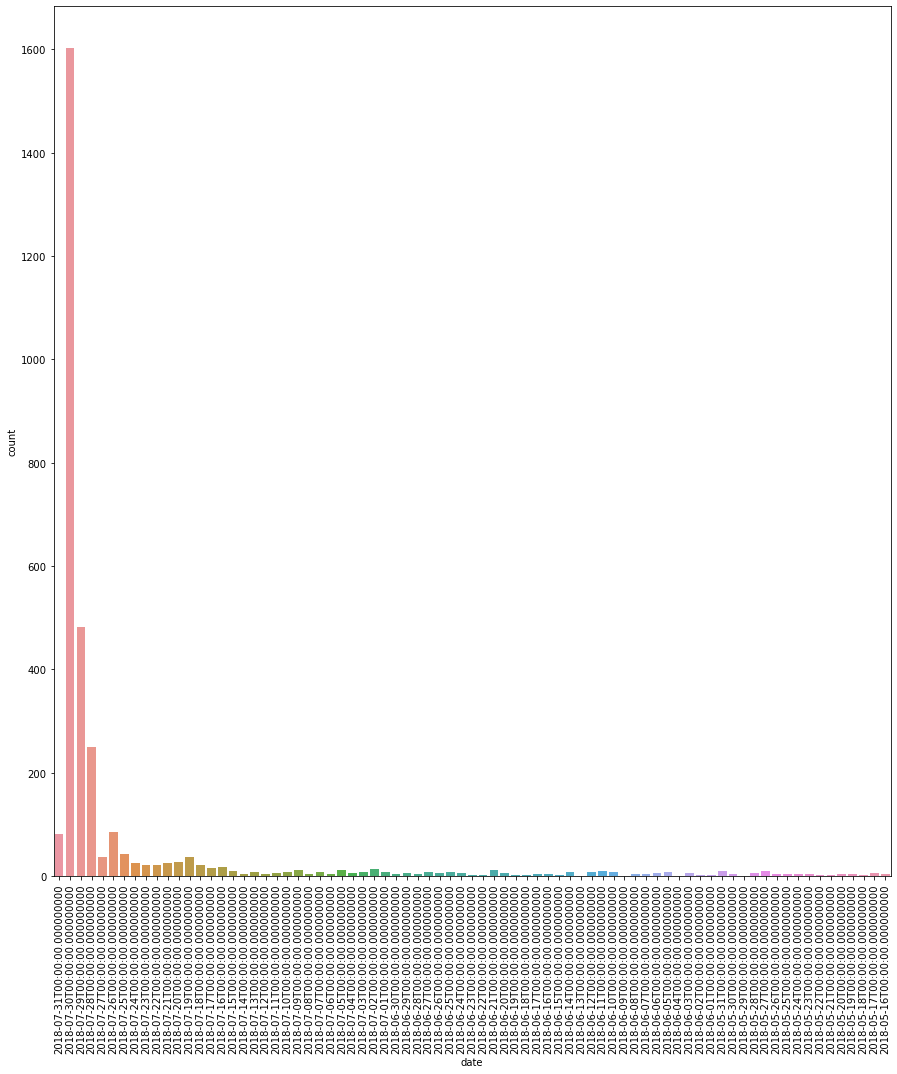

In [13]:
#11 displaying data graphically
plt.figure(figsize=(15,16))
sns.countplot(x='date',data=df_reviews)
plt.xticks(rotation=90)
plt.show();

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='count'>

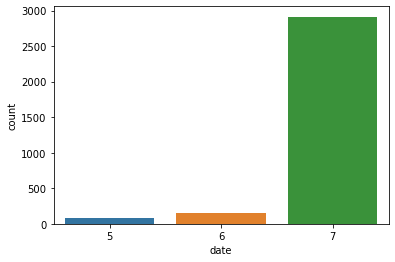

In [14]:
# 12 displaying three month sales
sns.countplot(df_reviews['date'].dt.month)

In [15]:
#13 displaying three month sales in numbers
df_reviews['date'].dt.month.value_counts()

7    2913
6     155
5      82
Name: date, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

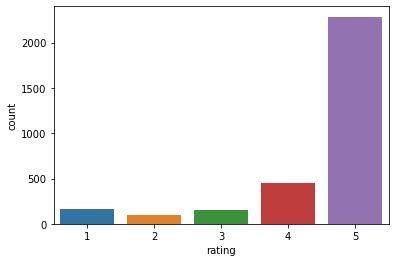

In [16]:
#14 graphical display of user rating
sns.countplot(x='rating',data=df_reviews)

In [17]:
#15 display numerical alues
df_reviews.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

1    2893
0     257
Name: feedback, dtype: int64

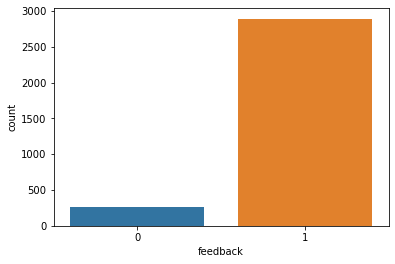

In [18]:
#16 display graph and numerical values of user feedback for amazon alexa products
sns.countplot(x='feedback',data=df_reviews)
df_reviews.feedback.value_counts()

count    3150.000000
mean       25.293016
std        34.584971
min         0.000000
25%         6.000000
50%        14.000000
75%        32.000000
max       526.000000
Name: length, dtype: float64

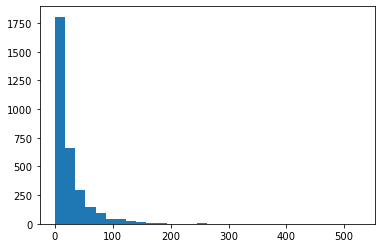

In [19]:
#step 17 lenghth of review in number and graphs
df_reviews['length']=df_reviews['verified_reviews'].apply(lambda x:len(x.split()))
df_reviews.head()
plt.hist(x='length', data=df_reviews,bins=30)
df_reviews.length.describe()

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


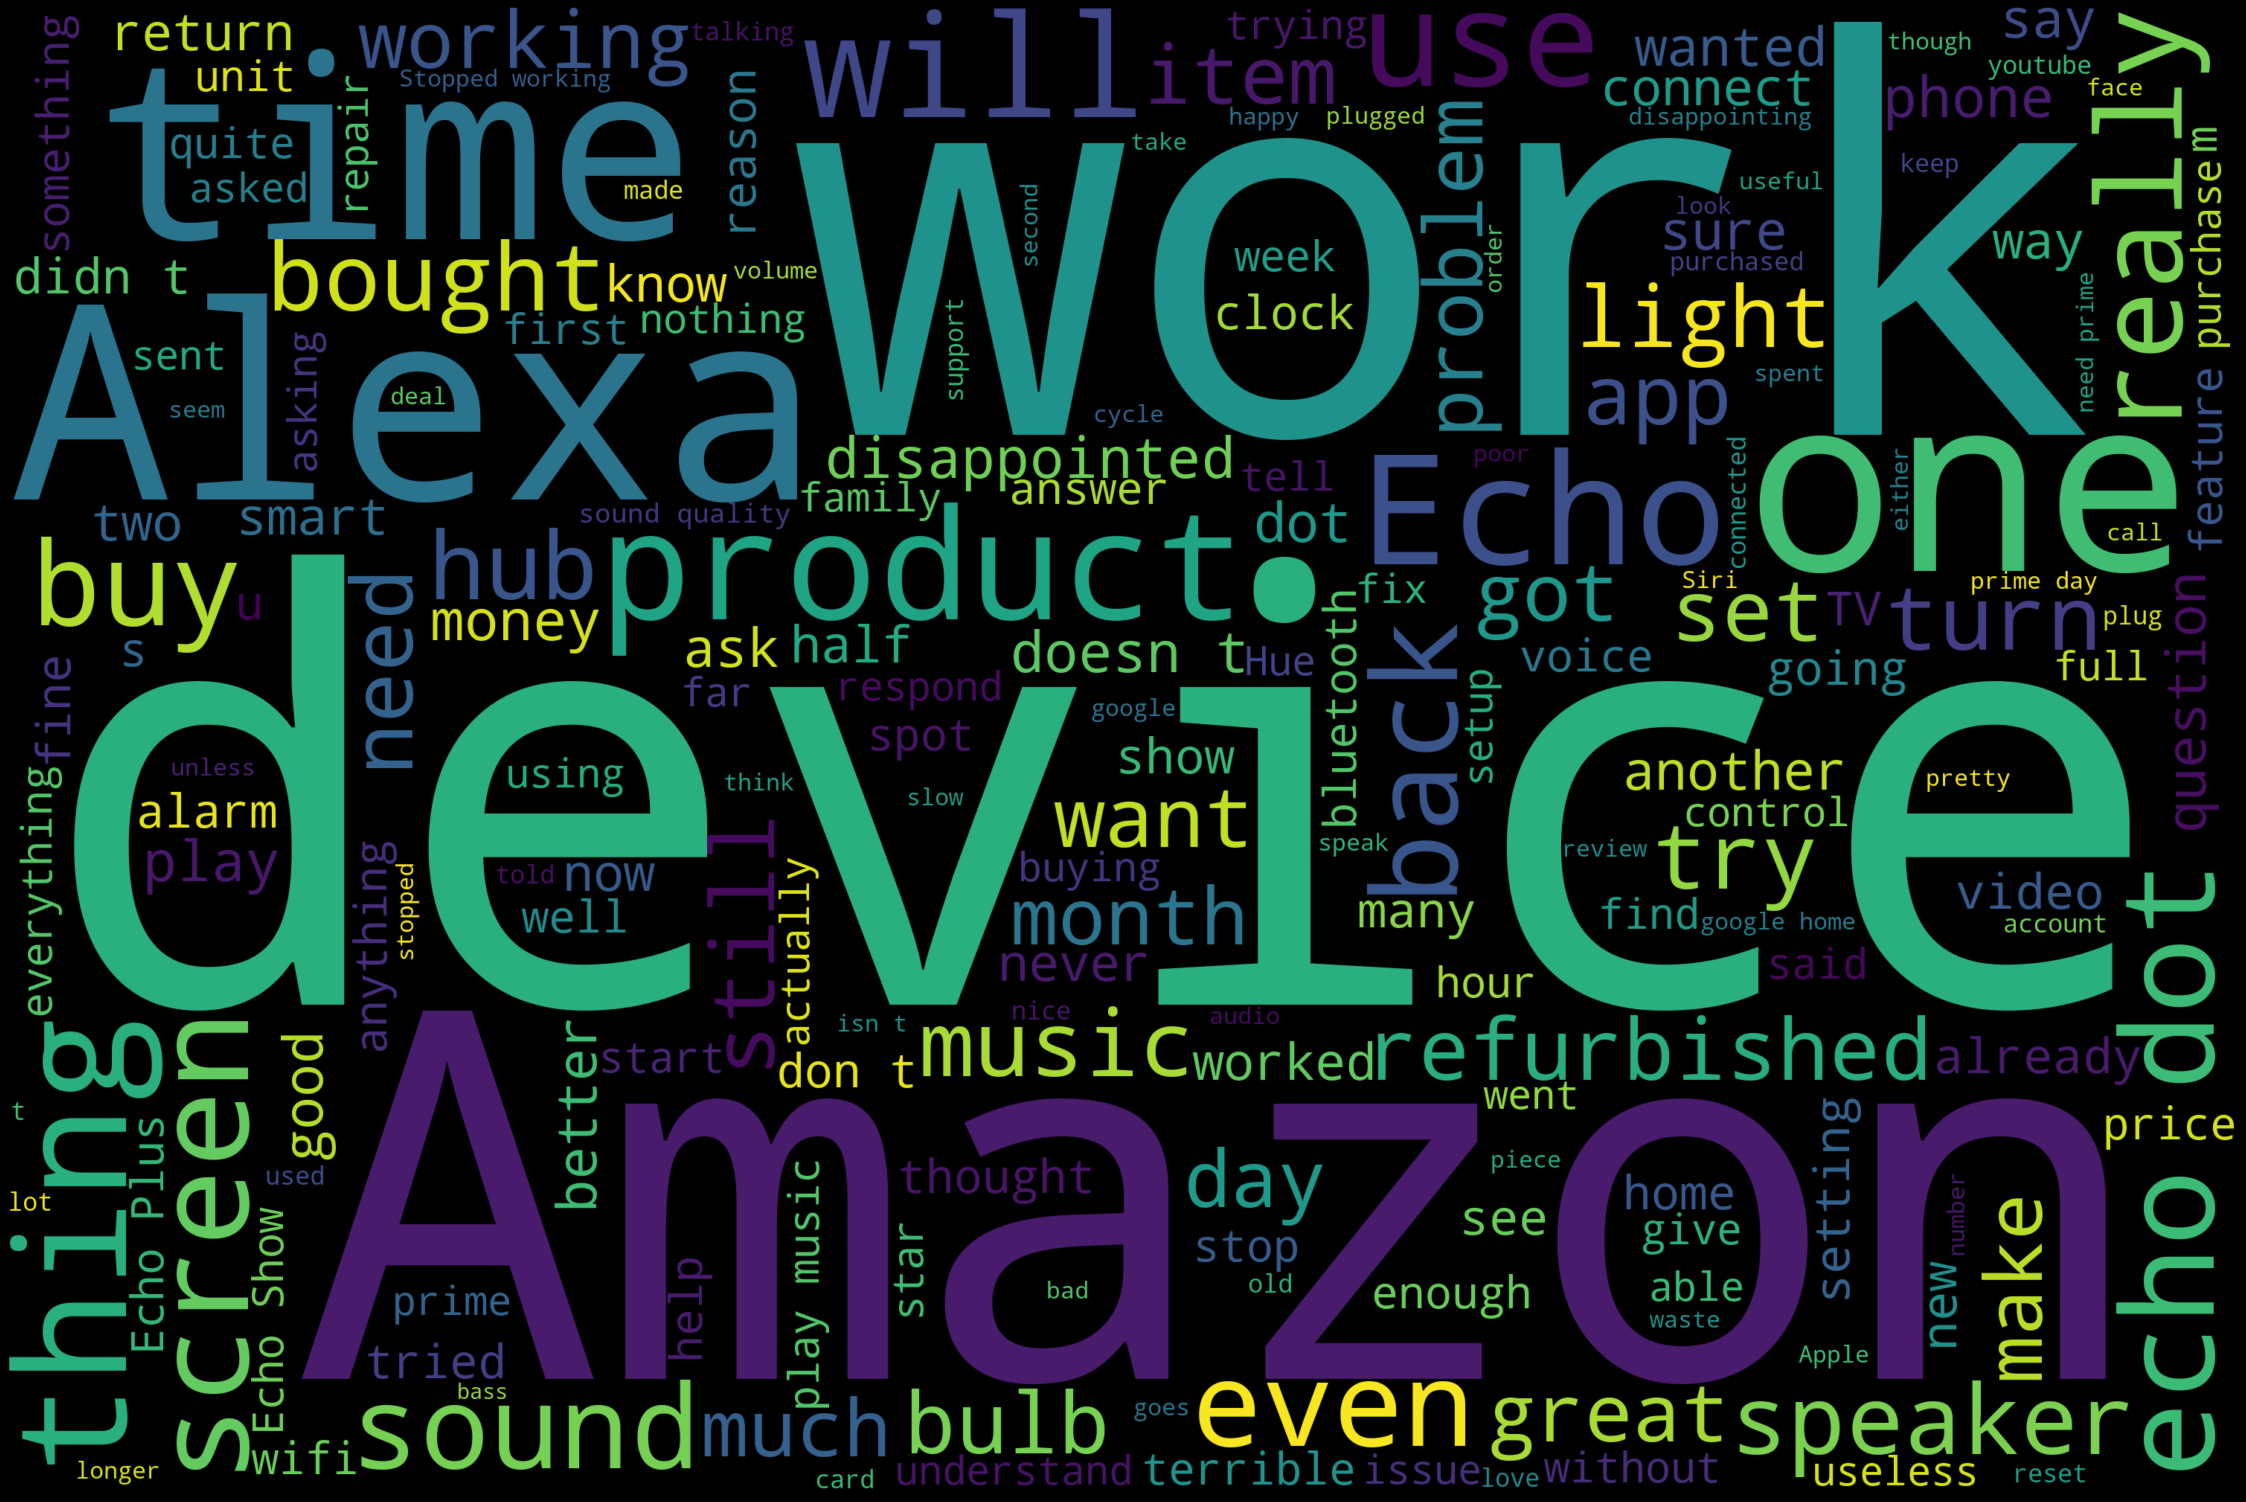

In [22]:
#step 18 generating wordcloud
neg=df_reviews[df_reviews['feedback']==0]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text=neg['verified_reviews'].values
wordcloud=WordCloud(
     width=3000,
     height=2000,
     background_color='black',
     stopwords = STOPWORDS).generate(str(text))
fig=plt.figure(
    figsize=(40,30),
    facecolor='k',
    edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tick_params(axis='both',labelsize=14)
plt.show()

<AxesSubplot:>

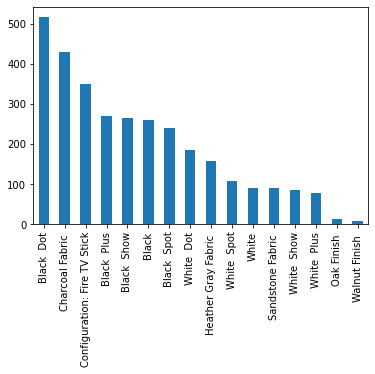

In [23]:
df_reviews['variation'].value_counts().plot.bar()

In [24]:
df_reviews['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

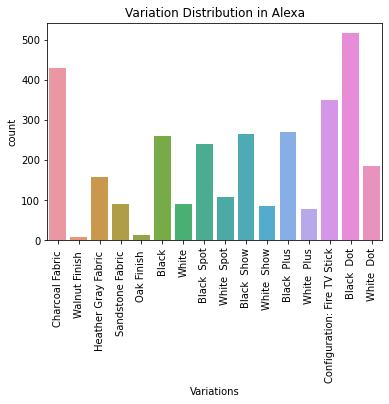

In [26]:
sns.countplot(x='variation',data=df_reviews)
plt.title('Variation Distribution in Alexa')
plt.xlabel('Variations')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()